# Intro to Convolution:

A convolution is a mathematical operation that generates a new function from the combination of two other functions. The way the combination is done is by essentially multiplying the two functions at a specific index n and shifting either function, but only one of them, as a function of k. The formulation looks like this:
	\begin{align}
\ y[n] & = x[n]*h[n] = \sum_{k=-\infty}^{\infty} x[n-k]h[k]  \\
\end{align}
graphically, in the discrete time for which we will be dealing in, it will look like one function sliding across another and computing a dot product between the two functions.


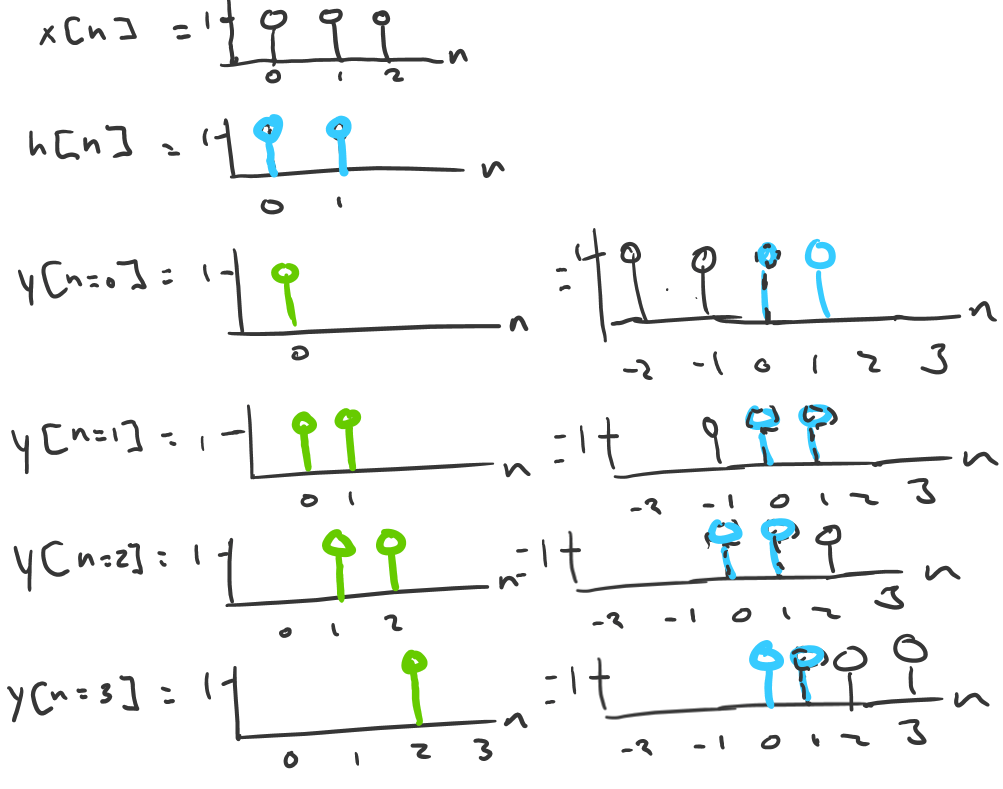

The diagram on the right of each y just shows how the two functions “slide” across one another, x[n] became a function of k as n is a constant picked for each y[n] so k slides x[n] across h[n] to do a dot product.

Convolution is used in many real-world applications, such as a frequency analysis tool in signal processing. In the case of CNN, we are combining the input we receive and the weights of the neural network to generate an algorithm that will activate neurons for classification. The x[n] being the input signal and our h[n] being the weights we are training.


Problem 1:
This problem asks you to solve the y[n] given x[n] and h[k].


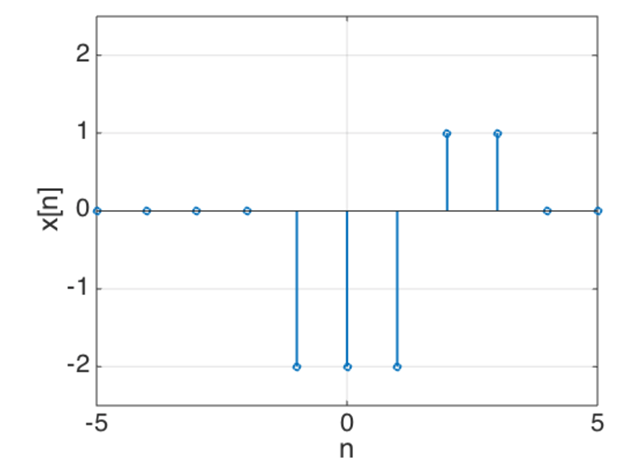

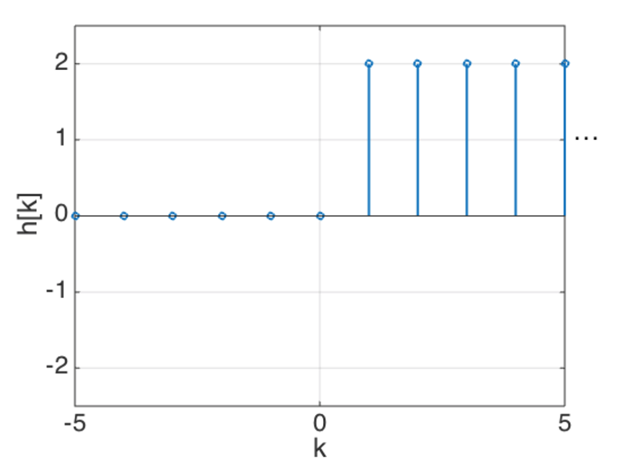

y[-2] = ??

y[0] = ??

y[1] = ??

y[2] = ??

y[3] = ??

y[10] = ??

y[100] = ??

Problem provided by ECE 330 convolution practice activity

In [80]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.misc import electrocardiogram
import sys


<IPython.core.display.Javascript object>


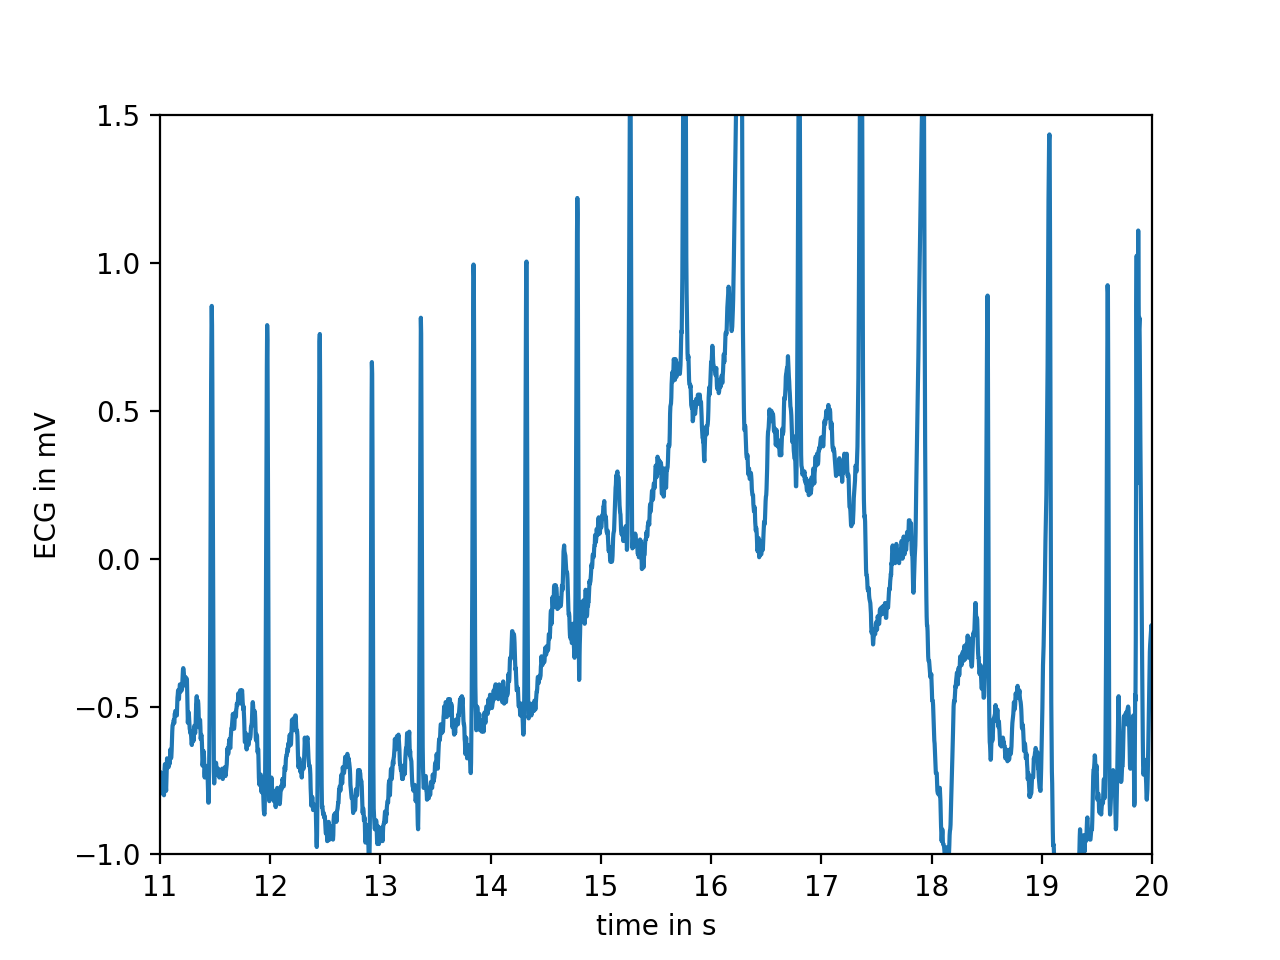

In [88]:
ecg = electrocardiogram()
fs = 360;
time = np.arange(ecg.size) / fs;
plt.plot(time, ecg);
plt.xlabel("time in s")
plt.ylabel("ECG in mV")
plt.xlim(11, 20);
plt.ylim(-1, 1.5);
plt.show();

#Code Provided by scipy package

###### ECG File Courtesy of MIT-BIH

In [8]:
# Convolution for a 1D image and filter with stride = 1
def convolution1D(image, filt):
    # Set up output array
    outDim = image.shape[0] - (filt.shape[0] - 1)
    out = np.zeros((outDim))

    filtLen = len(filt)

    for i in range(outDim):
        for j in range(filtLen):
            out[i] = out[i] + image[i + j]*filt[j]
    
    return out

image = np.array([1,2,3,4,5,6,7,8,9,10])
filt = np.array([.5,.5])

result = convolution1D(image, filt)
print(result)

[1.5 2.5 3.5 4.5 5.5 6.5 7.5 8.5 9.5]


The functions below implement different elements that construct a single layer in a CNN.
- Convolution
- Pooling (we're using max pooling)
- Activation function (we're using ReLU)

In [33]:
"""
Convolutional neural network layer functions. Implemented with numpy.
Code adapted from online article "Building Convolutional Neural Network using Numpy from Scratch" by Ahmed Gad
Article can be found here: https://towardsdatascience.com/building-convolutional-neural-network-using-numpy-from-scratch-b30aac50e50a
For article source code: https://github.com/ahmedfgad/NumPyCNN
"""

def conv_(img, conv_filter):
    filter_size = conv_filter.shape[1]
    result = np.zeros((img.shape))
    #Looping through the image to apply the convolution operation.
    for r in np.uint16(np.arange(filter_size/2.0, 
                          img.shape[0]-filter_size/2.0+1)):
        for c in np.uint16(np.arange(filter_size/2.0, 
                                           img.shape[1]-filter_size/2.0+1)):
            """
            Getting the current region to get multiplied with the filter.
            How to loop through the image and get the region based on 
            the image and filer sizes is the most tricky part of convolution.
            """
            curr_region = img[r-np.uint16(np.floor(filter_size/2.0)):r+np.uint16(np.ceil(filter_size/2.0)), 
                              c-np.uint16(np.floor(filter_size/2.0)):c+np.uint16(np.ceil(filter_size/2.0))]
            #Element-wise multipliplication between the current region and the filter.
            curr_result = curr_region * conv_filter
            conv_sum = np.sum(curr_result) #Summing the result of multiplication.
            result[r, c] = conv_sum #Saving the summation in the convolution layer feature map.
            
    #Clipping the outliers of the result matrix.
    final_result = result[np.uint16(filter_size/2.0):result.shape[0]-np.uint16(filter_size/2.0), 
                          np.uint16(filter_size/2.0):result.shape[1]-np.uint16(filter_size/2.0)]
    return final_result

def conv(img, conv_filter):

    # An empty feature map to hold the output of convolving the filter(s) with the image.
    feature_maps = np.zeros((img.shape[0]-conv_filter.shape[1]+1, 
                                img.shape[1]-conv_filter.shape[1]+1, 
                                conv_filter.shape[0]))

    # Convolving the image by the filter(s).
    for filter_num in range(conv_filter.shape[0]):
        
        curr_filter = conv_filter[filter_num, :] # getting a filter from the bank.
        """ 
        Checking if there are mutliple channels for the single filter.
        If so, then each channel will convolve the image.
        The result of all convolutions are summed to return a single feature map.
        """
        if len(curr_filter.shape) > 2:
            conv_map = conv_(img[:, :, 0], curr_filter[:, :, 0]) # Array holding the sum of all feature maps.
            for ch_num in range(1, curr_filter.shape[-1]): # Convolving each channel with the image and summing the results.
                conv_map = conv_map + conv_(img[:, :, ch_num], 
                                  curr_filter[:, :, ch_num])
        else: # There is just a single channel in the filter.
            conv_map = conv_(img, curr_filter)
        feature_maps[:, :, filter_num] = conv_map # Holding feature map with the current filter.
    return feature_maps # Returning all feature maps.
    

def pooling(feature_map, size=2, stride=2):
    #Preparing the output of the pooling operation.
    pool_out = np.zeros((np.uint16((feature_map.shape[0]-size+1)/stride+1),
                            np.uint16((feature_map.shape[1]-size+1)/stride+1),
                            feature_map.shape[-1]))
    for map_num in range(feature_map.shape[-1]):
        r2 = 0
        for r in np.arange(0,feature_map.shape[0]-size+1, stride):
            c2 = 0
            for c in np.arange(0, feature_map.shape[1]-size+1, stride):
                pool_out[r2, c2, map_num] = np.max([feature_map[r:r+size,  c:c+size, map_num]])
                c2 = c2 + 1
            r2 = r2 +1
    return pool_out

def relu(feature_map):
    #Preparing the output of the ReLU activation function.
    relu_out = np.zeros(feature_map.shape)
    for map_num in range(feature_map.shape[-1]):
        for r in np.arange(0,feature_map.shape[0]):
            for c in np.arange(0, feature_map.shape[1]):
                relu_out[r, c, map_num] = np.max([feature_map[r, c, map_num], 0])
    return relu_out


Now we will use the skimage tool to import a picture of cat. We will use this image as input data to our CNN and use 2 filters for feature detection. One filter will be for detecting horizontal edges and the other will be for detecting vertical edges.
Run the script below to import and view the example cat image.

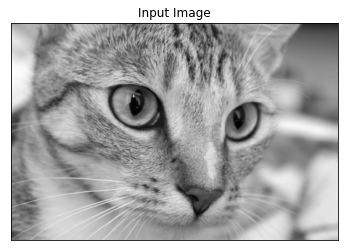

In [29]:
import skimage.data
import matplotlib

# Reading the image - a cat
img = skimage.data.chelsea()

# Converting the image into gray.
img = skimage.color.rgb2gray(img)

# Graphing results
fig0, ax0 = plt.subplots(nrows=1, ncols=1)
ax0.imshow(img).set_cmap("gray")
ax0.set_title("Input Image")
ax0.get_xaxis().set_ticks([])
ax0.get_yaxis().set_ticks([])
plt.show()

A beautiful creature, eh? According to the database, her name is Chelsea. The script below assembles the first layer of our CNN. First we create our two filters for horizontal and vertical edge detection. Feature Map1 resembles the vertical edge filter while feature Map2 is the horizontal filter. 
- So first we perform the convolution of the filters over the input image and create a feature map. 
- Next, that feature map is put through the ReLU activation function to change any negative values to 0. 
- Finally, the output of the ReLU step is put through the max pooling function where the size of the image is reduced by only keeping the highest value within 2x2 matrix.

**Working with convolution layer 1**
**ReLU**
**Pooling**
**End of conv layer 1**



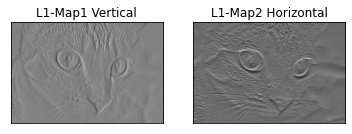

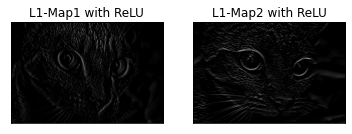

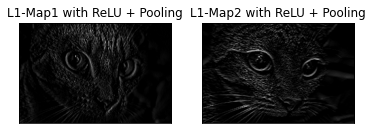

In [34]:
# First conv layer
l1_filter = numpy.zeros((2,3,3))

# Vertical edge detection
l1_filter[0, :, :] = np.array([[[-1, 0, 1], 
                                [-1, 0, 1], 
                                [-1, 0, 1]]])
# Horizontal edge detection
l1_filter[1, :, :] = np.array([[[1,   1,  1], 
                                [0,   0,  0], 
                                [-1, -1, -1]]])

print("**Working with convolution layer 1**")
l1_feature_map = conv(img, l1_filter)
print("**ReLU**")
l1_feature_map_relu = relu(l1_feature_map)
print("**Pooling**")
l1_feature_map_relu_pool = pooling(l1_feature_map_relu, 2, 2)
print("**End of conv layer 1**\n")

# Layer 1
fig1, ax1 = plt.subplots(nrows=1, ncols=2)
ax1[0].imshow(l1_feature_map[:, :, 0]).set_cmap("gray")
ax1[0].get_xaxis().set_ticks([])
ax1[0].get_yaxis().set_ticks([])
ax1[0].set_title("L1-Map1 Vertical")

ax1[1].imshow(l1_feature_map[:, :, 1]).set_cmap("gray")
ax1[1].get_xaxis().set_ticks([])
ax1[1].get_yaxis().set_ticks([])
ax1[1].set_title("L1-Map2 Horizontal")
plt.show()

fig11, ax11 = plt.subplots(nrows=1, ncols=2)
ax11[0].imshow(l1_feature_map_relu[:, :, 0]).set_cmap("gray")
ax11[0].get_xaxis().set_ticks([])
ax11[0].get_yaxis().set_ticks([])
ax11[0].set_title("L1-Map1 with ReLU")

ax11[1].imshow(l1_feature_map_relu[:, :, 1]).set_cmap("gray")
ax11[1].get_xaxis().set_ticks([])
ax11[1].get_yaxis().set_ticks([])
ax11[1].set_title("L1-Map2 with ReLU")
plt.show()

fig12, ax12 = plt.subplots(nrows=1, ncols=2)
ax12[0].imshow(l1_feature_map_relu_pool[:, :, 0]).set_cmap("gray")
ax12[0].get_xaxis().set_ticks([])
ax12[0].get_yaxis().set_ticks([])
ax12[0].set_title("L1-Map1 with ReLU + Pooling")

ax12[1].imshow(l1_feature_map_relu_pool[:, :, 1]).set_cmap("gray")
ax12[1].get_xaxis().set_ticks([])
ax12[1].get_yaxis().set_ticks([])
ax12[1].set_title("L1-Map2 with ReLU + Pooling")
plt.show()


[[[[0.72273907 0.35712743]
   [0.46295193 0.38357944]
   [0.57482894 0.41924185]
   [0.26224721 0.08258208]
   [0.54089914 0.28003696]]

  [[0.08220218 0.54564028]
   [0.45750923 0.06855085]
   [0.01185929 0.74988163]
   [0.93781521 0.49051852]
   [0.91280243 0.16616965]]

  [[0.90689315 0.67686147]
   [0.97285181 0.03206178]
   [0.07453012 0.64642582]
   [0.9203943  0.58019583]
   [0.16462388 0.08405904]]

  [[0.7224008  0.59922525]
   [0.43017534 0.27698206]
   [0.51983246 0.15567778]
   [0.42448649 0.62133476]
   [0.94712847 0.18497647]]

  [[0.29037257 0.79058259]
   [0.89841064 0.81911787]
   [0.69652202 0.80337222]
   [0.29701264 0.33675626]
   [0.28162468 0.88335705]]]


 [[[0.83642824 0.02337592]
   [0.44805825 0.42412419]
   [0.85607229 0.53828991]
   [0.66293378 0.40869259]
   [0.27009359 0.5302003 ]]

  [[0.18651998 0.46235957]
   [0.92074427 0.16762411]
   [0.24161972 0.70057287]
   [0.89227264 0.07524951]
   [0.81984128 0.32656884]]

  [[0.01809811 0.76311753]
   [0.615949

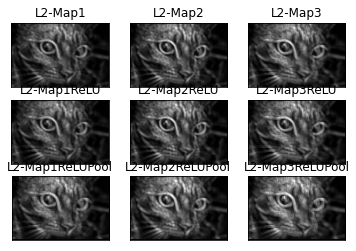

In [35]:
# Second conv layer
l2_filter = np.random.rand(3, 5, 5, l1_feature_map_relu_pool.shape[-1])
print("\n**Working with conv layer 2**")
l2_feature_map = conv(l1_feature_map_relu_pool, l2_filter)
print("**ReLU**")
l2_feature_map_relu = relu(l2_feature_map)
print("**Pooling**")
l2_feature_map_relu_pool = pooling(l2_feature_map_relu, 2, 2)
print("**End of conv layer 2**\n")

# Layer 2
fig2, ax2 = plt.subplots(nrows=3, ncols=3)
ax2[0, 0].imshow(l2_feature_map[:, :, 0]).set_cmap("gray")
ax2[0, 0].get_xaxis().set_ticks([])
ax2[0, 0].get_yaxis().set_ticks([])
ax2[0, 0].set_title("L2-Map1")

ax2[0, 1].imshow(l2_feature_map[:, :, 1]).set_cmap("gray")
ax2[0, 1].get_xaxis().set_ticks([])
ax2[0, 1].get_yaxis().set_ticks([])
ax2[0, 1].set_title("L2-Map2")

ax2[0, 2].imshow(l2_feature_map[:, :, 2]).set_cmap("gray")
ax2[0, 2].get_xaxis().set_ticks([])
ax2[0, 2].get_yaxis().set_ticks([])
ax2[0, 2].set_title("L2-Map3")

ax2[1, 0].imshow(l2_feature_map_relu[:, :, 0]).set_cmap("gray")
ax2[1, 0].get_xaxis().set_ticks([])
ax2[1, 0].get_yaxis().set_ticks([])
ax2[1, 0].set_title("L2-Map1ReLU")

ax2[1, 1].imshow(l2_feature_map_relu[:, :, 1]).set_cmap("gray")
ax2[1, 1].get_xaxis().set_ticks([])
ax2[1, 1].get_yaxis().set_ticks([])
ax2[1, 1].set_title("L2-Map2ReLU")

ax2[1, 2].imshow(l2_feature_map_relu[:, :, 2]).set_cmap("gray")
ax2[1, 2].get_xaxis().set_ticks([])
ax2[1, 2].get_yaxis().set_ticks([])
ax2[1, 2].set_title("L2-Map3ReLU")

ax2[2, 0].imshow(l2_feature_map_relu_pool[:, :, 0]).set_cmap("gray")
ax2[2, 0].get_xaxis().set_ticks([])
ax2[2, 0].get_yaxis().set_ticks([])
ax2[2, 0].set_title("L2-Map1ReLUPool")

ax2[2, 1].imshow(l2_feature_map_relu_pool[:, :, 1]).set_cmap("gray")
ax2[2, 1].get_xaxis().set_ticks([])
ax2[2, 1].get_yaxis().set_ticks([])
ax2[2, 1].set_title("L2-Map2ReLUPool")

ax2[2, 2].imshow(l2_feature_map_relu_pool[:, :, 2]).set_cmap("gray")
ax2[2, 2].get_xaxis().set_ticks([])
ax2[2, 2].get_yaxis().set_ticks([])
ax2[2, 2].set_title("L2-Map3ReLUPool")
plt.show()



**Working with conv layer 3**
**ReLU**
**Pooling**
**End of conv layer 3**



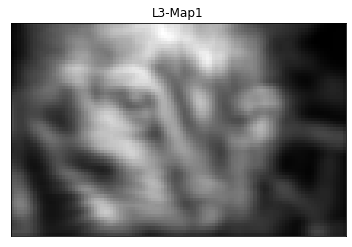

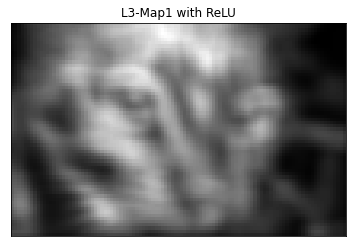

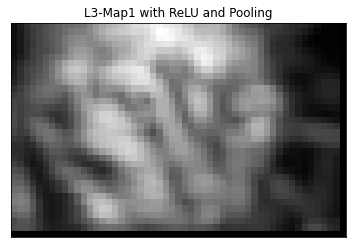

In [24]:
# Third conv layer
l3_filter = numpy.random.rand(1, 7, 7, l2_feature_map_relu_pool.shape[-1])
print("\n**Working with conv layer 3**")
l3_feature_map = conv(l2_feature_map_relu_pool, l3_filter)
print("**ReLU**")
l3_feature_map_relu = relu(l3_feature_map)
print("**Pooling**")
l3_feature_map_relu_pool = pooling(l3_feature_map_relu, 2, 2)
print("**End of conv layer 3**\n")

# Layer 3
fig30, ax30 = plt.subplots(nrows=1, ncols=1)
ax30.imshow(l3_feature_map[:, :, 0]).set_cmap("gray")
ax30.get_xaxis().set_ticks([])
ax30.get_yaxis().set_ticks([])
ax30.set_title("L3-Map1")
plt.show()

fig31, ax31 = plt.subplots(nrows=1, ncols=1)
ax31.imshow(l3_feature_map_relu[:, :, 0]).set_cmap("gray")
ax31.get_xaxis().set_ticks([])
ax31.get_yaxis().set_ticks([])
ax31.set_title("L3-Map1 with ReLU")
plt.show()

fig32, ax32 = plt.subplots(nrows=1, ncols=1)
ax32.imshow(l3_feature_map_relu_pool[:, :, 0]).set_cmap("gray")
ax32.get_xaxis().set_ticks([])
ax32.get_yaxis().set_ticks([])
ax32.set_title("L3-Map1 with ReLU and Pooling")
plt.show()